# 1. 손 글씨 숫자 데이터셋
손글씨 숫자 데이터셋은 0부터 9까지의 숫자를 손글씨로 쓴 흑백 이미지로 구성되어 있으며, 각 이미지는 8x8 픽셀 크기의 64차원 벡터로 표현됩니다. 각 픽셀 값은 0(흰색)에서 16(검은색)까지의 명암값을 가집니다. 이 데이터는 총 1797개의 샘플로 이루어져 있으며, 각 샘플에는 숫자 클래스(0~9)가 레이블로 붙어 있습니다. 주로 분류 알고리즘을 학습시키거나 데이터 시각화, 차원 축소 기법 등을 실험하는 데 사용됩니다.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader # 핵심!!
digits = load_digits()

X_data = digits['data']
y_data = digits['target']
# 검정색 바탕에 흰 글씨로 되어 있을 것. 1797개 있다.

print(X_data) # 이미지 자체
print(y_data) #정답

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

손글씨 데이터

In [4]:
print(X_data.shape)
print(y_data.shape)

(1797, 64)
(1797,)




### ※ axes.flatten()

axes.flatten()은 다차원 배열 형태로 구성된 Matplotlib의 서브플롯 배열을 1차원 배열로 변환하는 메서드입니다. Matplotlib에서 다수의 서브플롯을 생성할 때, plt.subplots()는 2차원 배열 형태로 서브플롯 객체를 반환합니다. 이 배열은 각 서브플롯을 접근하기 위해 행과 열의 인덱스를 사용해야 하지만, flatten() 메서드를 사용하면 이 배열을 1차원으로 펼쳐서 각 서브플롯을 단일 인덱스로 순회할 수 있게 됩니다.

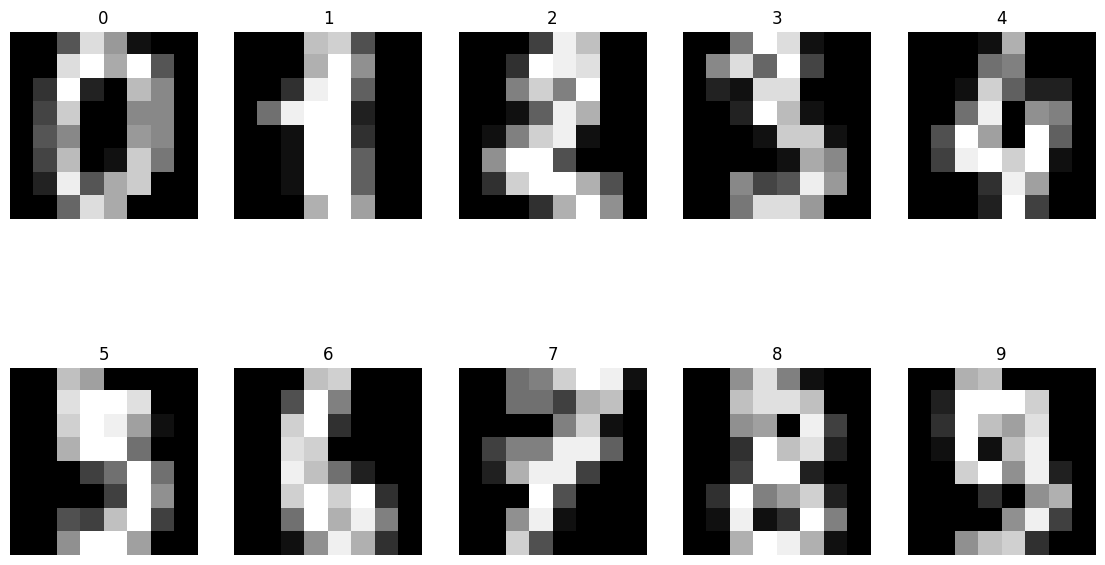

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 8))
# 2개의 행, 5개의 열, 전체 도화지 사이즈

# axes.flatten() : 한 줄로 평평하게 해주세요! 일단 한 열로 만들어주세요!
# 그래서 이중이 아니라 그냥 for문으로 돌릴 수 있음
for i, ax in enumerate(axes.flatten()):
    # ax.imshow : 화면에 이미지를 보여줘라. reshape((8, 8)) : 1열로 되어있는 걸 8,8로 바꿔줘라.
    ax.imshow(X_data[i].reshape((8, 8)), cmap='gray')
    ax.set_title(y_data[i])
    ax.axis('off')

In [6]:
X_data = torch.FloatTensor(X_data)
y_data = torch.LongTensor(y_data)

print(X_data.shape)
print(y_data.shape)

torch.Size([1797, 64])
torch.Size([1797])


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2025)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([1437, 64]) torch.Size([1437])
torch.Size([360, 64]) torch.Size([360])


# 2. 데이터 로더
데이터로더(Data Loader)는 데이터셋을 효율적으로 관리하고, 모델 학습 과정에서 데이터를 쉽게 가져올 수 있도록 도와주는 도구입니다. 일반적으로 데이터셋을 배치(batch) 단위로 나누어 모델에 제공하며, 데이터의 크기가 클 경우에도 메모리 효율적으로 처리할 수 있도록 설계되었습니다. 데이터 증강, 셔플링, 병렬 처리와 같은 기능을 지원하여 학습 성능을 향상시키고, 모델 학습과 평가 시 일관된 데이터 제공 방식을 유지합니다. 딥러닝 프레임워크에서는 PyTorch의 DataLoader나 TensorFlow의 tf.data 같은 도구를 통해 쉽게 사용할 수 있습니다.

### ※ 데이터로더의 주요 역할

1. 배치 처리: 데이터를 지정된 크기의 배치로 나누어 모델에 제공.
2. 셔플링: 데이터 순서를 무작위로 섞어 과적합 방지.
3. 병렬 처리: num_workers 옵션을 통해 데이터를 병렬로 로드하여 속도 향상.
4. 반복 처리: 학습 epoch 동안 데이터를 자동으로 반복해서 제공.

In [8]:
loader = DataLoader(
    # 1. 데이터셋을 넣어줄건데, 리스트 형식으로 넣어주기.
    # 튜플로 제공할건데, 이미지와 정답을 함께 제공할 것.
    dataset=list(zip(x_train, y_train)),
    # 2. 보통은 2의 n승. (1437개 / 64 = 22번...29개 )
    batch_size=64, # 하나의 배치에 들어가는 개수
    shuffle = True,
    drop_last=False
)

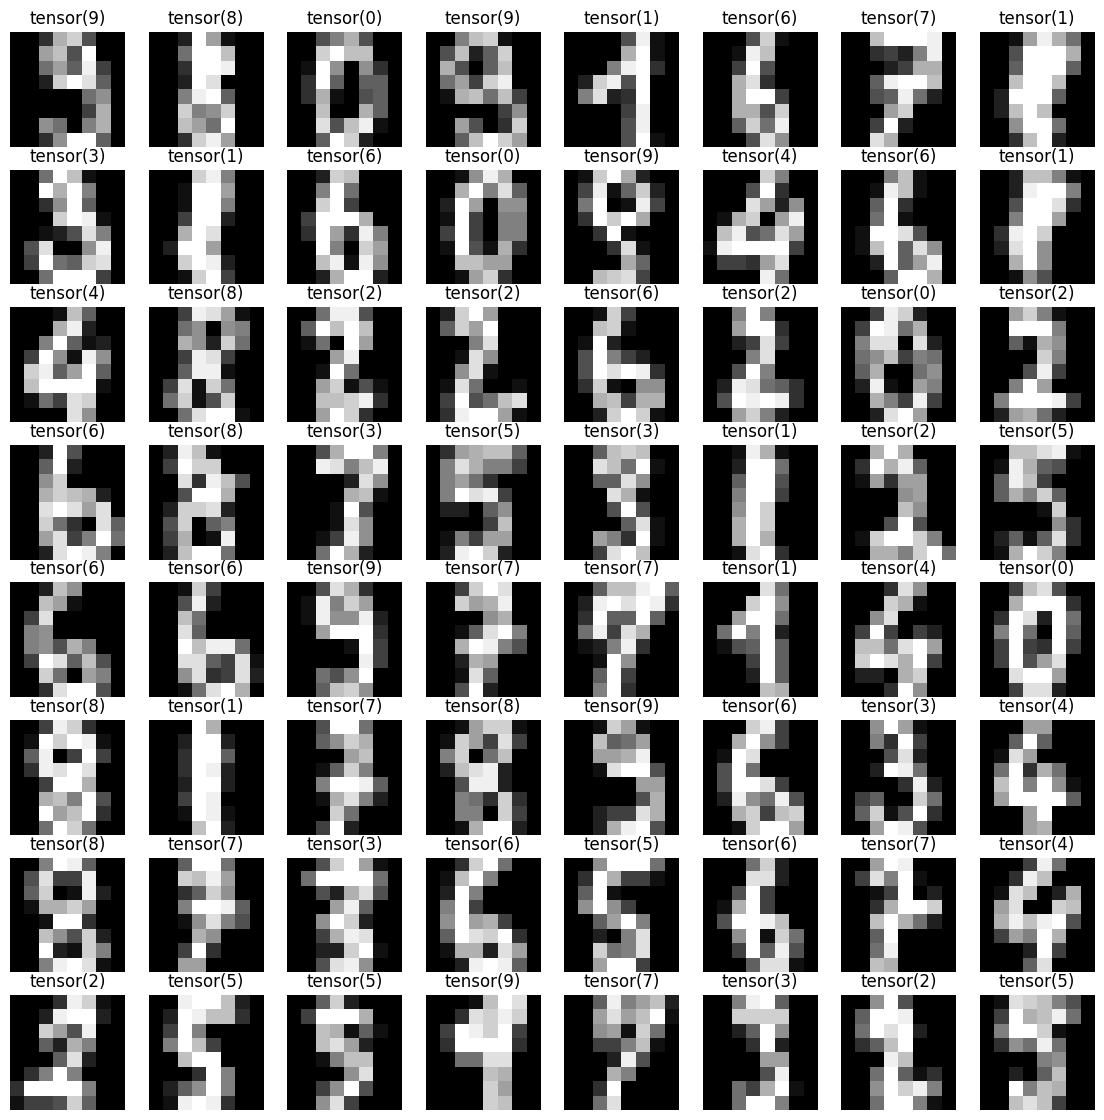

In [9]:
imgs, labels = next(iter(loader)) #이터레이터로 만들어주기 (반복문으로 쓸 수 있음)
# 64개 이미지, 64개 라벨 하나 빼줌

fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(14, 14))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((8, 8)), cmap='gray')
    ax.set_title(str(label))
    ax.axis('off')

In [10]:
model = nn.Sequential(
    nn.Linear(64, 10) #64개를 입력받아서 10개(0부터 9까지 확률)를 내보내줘야함
)

# 다항 로지스틱 회귀이기 때문에 softmax를 loss함수에 껴주면 된다.

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [11]:
epochs = 100
for epoch in range(epochs + 1):
    sum_losses = 0
    sum_accs = 0

    for x_batch, y_batch in loader:
        y_pred = model(x_batch)
        loss = nn.CrossEntropyLoss()(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses = sum_losses + loss

        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
        sum_accs = sum_accs + acc

    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)
    print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

Epoch    0/100 Loss: 1.722856 Accuracy: 58.44%
Epoch    1/100 Loss: 0.322174 Accuracy: 89.97%
Epoch    2/100 Loss: 0.170787 Accuracy: 94.79%
Epoch    3/100 Loss: 0.131928 Accuracy: 95.50%
Epoch    4/100 Loss: 0.112291 Accuracy: 96.64%
Epoch    5/100 Loss: 0.101349 Accuracy: 97.27%
Epoch    6/100 Loss: 0.085478 Accuracy: 97.69%
Epoch    7/100 Loss: 0.088551 Accuracy: 97.74%
Epoch    8/100 Loss: 0.082083 Accuracy: 97.68%
Epoch    9/100 Loss: 0.077720 Accuracy: 97.73%
Epoch   10/100 Loss: 0.064370 Accuracy: 98.02%
Epoch   11/100 Loss: 0.052246 Accuracy: 98.63%
Epoch   12/100 Loss: 0.043636 Accuracy: 99.18%
Epoch   13/100 Loss: 0.045640 Accuracy: 99.25%
Epoch   14/100 Loss: 0.038655 Accuracy: 99.46%
Epoch   15/100 Loss: 0.039807 Accuracy: 98.98%
Epoch   16/100 Loss: 0.036432 Accuracy: 99.32%
Epoch   17/100 Loss: 0.033307 Accuracy: 99.24%
Epoch   18/100 Loss: 0.032734 Accuracy: 99.52%
Epoch   19/100 Loss: 0.029694 Accuracy: 99.59%
Epoch   20/100 Loss: 0.025571 Accuracy: 99.73%
Epoch   21/10

tensor(5)


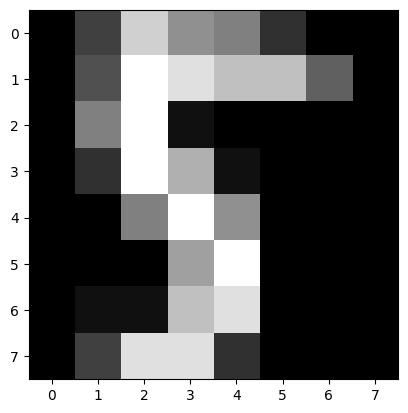

In [12]:
plt.imshow(x_test[10].reshape((8, 8)), cmap='gray')
print(y_test[10])

In [13]:
y_pred = model(x_test)
y_pred[10]

tensor([ -4.5748, -14.9358,  -4.5453,  -0.2196,  -9.4613,  13.2823, -11.8678,
         -0.2777,   2.1813,  -8.1998], grad_fn=<SelectBackward0>)

In [14]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[10]

tensor([1.7570e-08, 5.5596e-13, 1.8096e-08, 1.3683e-06, 1.3261e-10, 9.9998e-01,
        1.1952e-11, 1.2911e-06, 1.5097e-05, 4.6820e-10],
       grad_fn=<SelectBackward0>)

In [15]:
for i in range(10):
    print(f'숫자 {i}일 확률: {y_prob[10][i]:.2f}')

숫자 0일 확률: 0.00
숫자 1일 확률: 0.00
숫자 2일 확률: 0.00
숫자 3일 확률: 0.00
숫자 4일 확률: 0.00
숫자 5일 확률: 1.00
숫자 6일 확률: 0.00
숫자 7일 확률: 0.00
숫자 8일 확률: 0.00
숫자 9일 확률: 0.00


In [16]:
y_pred_index = torch.argmax(y_prob, axis=1)
accuracy = (y_test == y_pred_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy: .2f}% 입니다.')

테스트 정확도는  96.94% 입니다.


# 3. 데이터 증강

데이터 증강(Data Augmentation)은 학습 데이터를 인위적으로 변환하여 데이터셋의 다양성을 높이고 모델의 일반화 성능을 향상시키는 기법입니다. 회전, 크기 조정, 반전, 블러링, 밝기 조정 등 다양한 변환을 적용하여 원본 데이터로부터 새로운 데이터를 생성합니다. 이를 통해 데이터 부족 문제를 완화하고 모델이 특정 패턴에 과적합되지 않도록 도와줍니다. 특히, 이미지나 음성 데이터와 같이 특징이 직관적인 데이터에서 효과적으로 활용되며, 증강된 데이터는 모델이 예측 대상의 다양한 변형에 대해 강하게 학습할 수 있도록 돕습니다.

- 데이터가 부족하다고 생각할 때
- 과적합이 일어난 것 같을 때

https://docs.pytorch.org/vision/0.9/transforms.html  
데이터 증강 기법 종류 확인할 수 있는 사이트

In [17]:
from torchvision import transforms # 데이터를 변환할 때 쓰는 모듈 (변환 기법들이 있음)
from torch.utils.data import TensorDataset # 텐서형을 데이터 셋으로 저장하거나, 변환할 수 있는 모듈 (직접)
from torch.utils.data import Dataset # 텐서랑 상관 없이 데이터 셋을 구축할 때 쓰이는 모듈

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2025)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([1437, 64]) torch.Size([1437])
torch.Size([360, 64]) torch.Size([360])


In [19]:
# 텐서 데이터 셋으로 묶어보기
# 데이터 셋으로 만들어놓게 되면 데이터셋을 미니 배치 형식으로 묶어서 처리할 수 있는 로더에 집어넣기 편하다.
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [20]:
transform = transforms.Compose([
    transforms.RandomRotation(10), # 무작위 회전
    transforms.RandomAffine(0, shear=5, scale=(0.9, 1.1)), # 회전, 이미지 비틀기, 크기 조정
])

# 데이터를 여러가지 방식으로 변형할 때 쓰는 모듈.
# Compose는 여러 개를 한 꺼번에 변형시킬 때 쓸 수 있음. 그래서 대괄호 사용


###※ transforms.Compose

여러 데이터 변환(transform) 작업을 순차적으로 적용할 수 있도록 해줍니다. 이미지 데이터 전처리와 증강 과정에서 자주 사용되며, 각 변환을 하나의 리스트로 묶어 실행합니다.



1. transforms.RandomRotation(10)

- 기능: 이미지를 -10도에서 +10도 사이로 무작위 회전시킵니다.
    - 10은 회전 범위를 나타냅니다.
     -- 각 호출 시, -10도 ~ +10도 범위에서 무작위로 각도를 선택하여 이미지를 회전합니다.
2. transforms.RandomAffine(0, shear=5, scale=(0.9, 1.1))

- 기능: 이미지를 비틀기(shear), 크기 조정(scale) 등의 변환을 수행합니다.
    - 0: 회전(각도) 변환을 수행하지 않음을 의미합니다.
    - shear=5: 이미지를 최대 5도만큼 비스듬하게 비틀기(shear) 변환을 수행합니다.
        - 예: 정사각형이 평행사변형처럼 기울어질 수 있습니다.
    - scale=(0.9, 1.1):
        - 이미지를 0.9배(축소)에서 1.1배(확대) 범위 내에서 무작위 크기 조정을 수행합니다.
        - 각 호출 시, 무작위로 크기가 변경됩니다.

In [21]:
# 이런 방법 많이 쓰니까 중요해요!!

class AugmentedDataset(Dataset): #위에서 import 한 Dataset을 상속받아 만든다. (오버라이딩)
    def __init__(self, dataset, transform): # 객체를 만들 때, dataset도 넣을 거고, 변형도 넣을거임
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset) # 데이터가 몇 개인지 알려주고 싶어

    def __getitem__(self, idx):
        x, y = self.dataset[idx] # 이미지와 라벨을 분할해서 넣어줄 것 (원래는 64짜리 1줄)
        x = x.view(8, 8).unsqueeze(0)  # 8x8 이미지를 가상으로 1채널로 변환 (1,8,8)
        # unsqueeze : 0번에 차원 하나 늘려라.
        x = self.transform(x)  # 증강 적용
        return x.flatten(), y  # 다시 Flatten (다시 1열로 늘려달라)

# 객체 생성
augmented_train_dataset = AugmentedDataset(train_dataset, transform)

In [22]:
len(augmented_train_dataset)

1437

In [23]:
train_loader = DataLoader(augmented_train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
# 학습시키는 게 아닌데, 왜 64개씩 쪼갰어요? -> 제 맘이에요

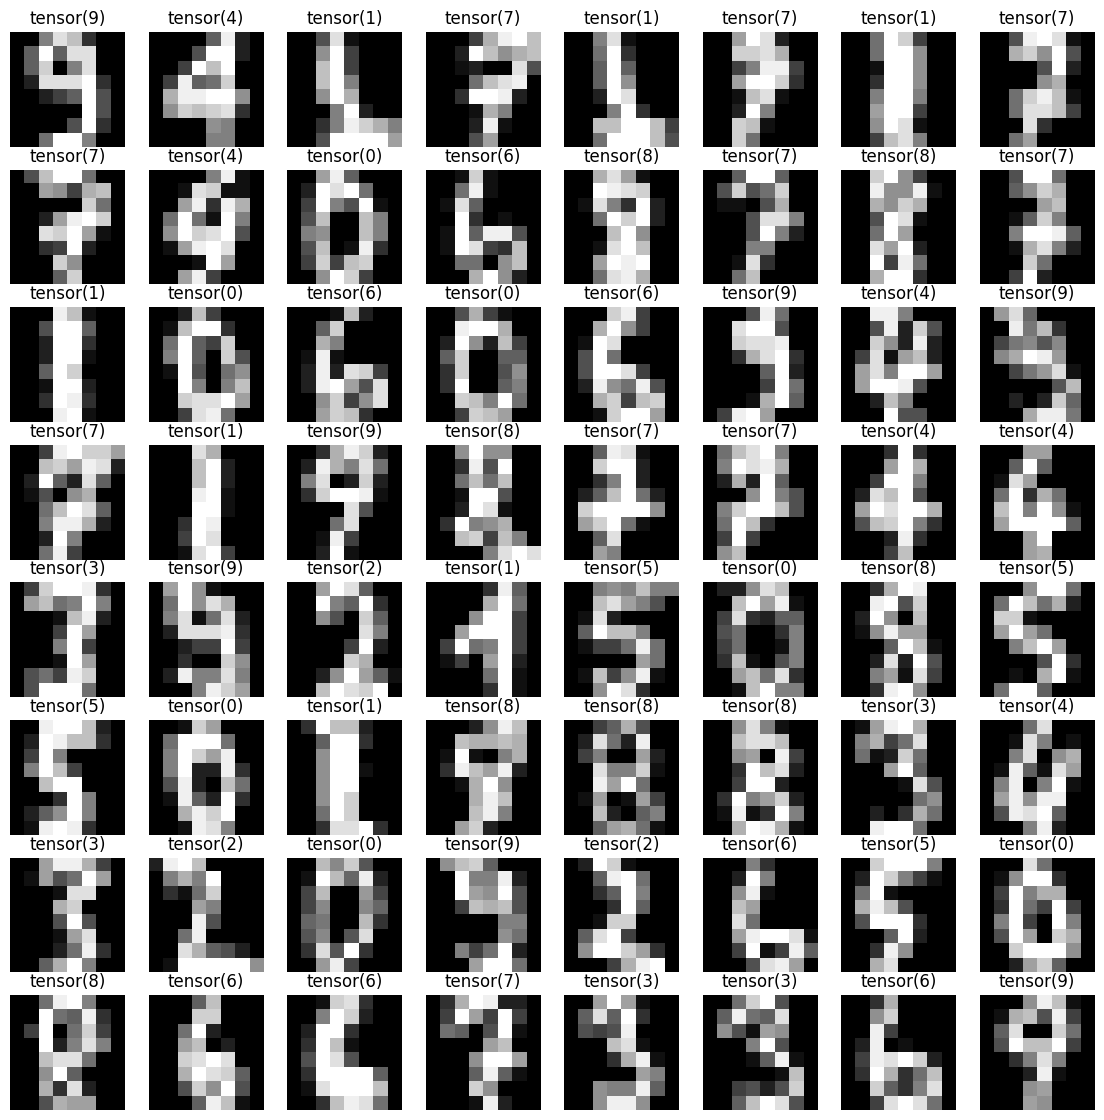

In [24]:
imgs, labels = next(iter(train_loader))
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(14, 14))
#하나씩 뽑아서 iter로 만들어서 순서대로 배열한 다음에 64개씩 들어갈 것
for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((8, 8)), cmap='gray')
    ax.set_title(str(label))
    ax.axis('off')

- 살짝 틀어져 있는 것들도 있고, 벗어난 것들도 있다. (데이터 증강 효과)

In [25]:
for images, labels in train_loader:
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")
    break

Image batch shape: torch.Size([64, 64])
Label batch shape: torch.Size([64])


# 증강기법 쓴 다음 다시 학습시켜보기

In [26]:
model = nn.Sequential(
    nn.Linear(64, 10)
)

optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 100
for epoch in range(epochs + 1):
    sum_losses = 0
    sum_accs = 0

    for x_batch, y_batch in train_loader:
        y_pred = model(x_batch) # 64개 넣어서 한 꺼번에 예측하기
        loss = nn.CrossEntropyLoss()(y_pred, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sum_losses = sum_losses + loss # 로스값을 다 더해준다.

        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
        sum_accs = sum_accs + acc

    if epoch % 10 == 0:
        avg_loss = sum_losses / len(loader)
        avg_acc = sum_accs / len(loader)
        print(f'Epoch {epoch:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

Epoch    0/100 Loss: 2.246336 Accuracy: 54.89%
Epoch   10/100 Loss: 0.070017 Accuracy: 97.69%
Epoch   20/100 Loss: 0.078268 Accuracy: 97.28%
Epoch   30/100 Loss: 0.041115 Accuracy: 99.10%
Epoch   40/100 Loss: 0.029937 Accuracy: 98.78%
Epoch   50/100 Loss: 0.018427 Accuracy: 99.52%
Epoch   60/100 Loss: 0.024723 Accuracy: 99.05%
Epoch   70/100 Loss: 0.036726 Accuracy: 98.71%
Epoch   80/100 Loss: 0.035253 Accuracy: 98.85%
Epoch   90/100 Loss: 0.060681 Accuracy: 97.74%
Epoch  100/100 Loss: 0.014033 Accuracy: 99.59%


tensor(7)


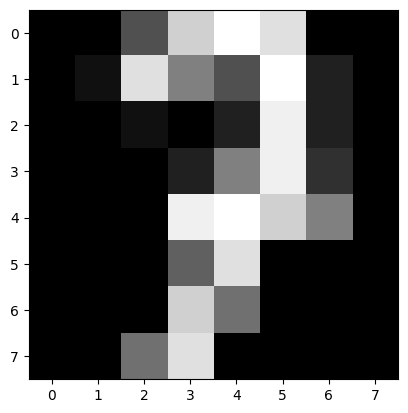

In [27]:
# 잘 맞추는 지 학인해보기!
plt.imshow(x_test[11].reshape((8, 8)), cmap='gray')
print(y_test[11])

In [28]:
y_pred = model(x_test) # 테스트를 다 넣었기 때문에,
y_pred[11] # 결과 중 11번만 보면 된다

tensor([-18.1495,  -7.1540,  -0.6443,  14.3158,  -2.8968,  -3.3383, -31.9708,
         29.2582,  -7.8698,   7.4571], grad_fn=<SelectBackward0>)

In [29]:
y_prob = nn.Softmax(1)(y_pred) #확률 뽑기
y_prob[11]

tensor([2.5768e-21, 1.5360e-16, 1.0316e-13, 3.2405e-07, 1.0846e-14, 6.9748e-15,
        2.5621e-27, 1.0000e+00, 7.5080e-17, 3.4033e-10],
       grad_fn=<SelectBackward0>)

In [30]:
for i in range(10):
    print(f'숫자 {i}일 확률: {y_prob[11][i]:.2f}')

숫자 0일 확률: 0.00
숫자 1일 확률: 0.00
숫자 2일 확률: 0.00
숫자 3일 확률: 0.00
숫자 4일 확률: 0.00
숫자 5일 확률: 0.00
숫자 6일 확률: 0.00
숫자 7일 확률: 1.00
숫자 8일 확률: 0.00
숫자 9일 확률: 0.00
